### **Preprocessing**

In [1]:
import pandas as pd

In [2]:
# load using pandas
dataset = pd.read_csv('assets/titanic.csv', index_col='PassengerId')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


**Pclass: Passenger class**<br>
1 = First class<br>
2 = Second class<br>
3 = Third class<br>
<br>
**SibSp: Number of siblings**<br>
<br>
**Parch: Number of parents or children**<br>
<br>
**Embarked**<br>
C = Cherbourg<br>
Q = Queenstown<br>
S = Southampton<br>

In [3]:
# handle missing values

mean_age = dataset['Age'].mean(skipna=True)
dataset.fillna({'Age': mean_age}, inplace=True)

mode_fare = dataset['Fare'].mode(dropna=True)[0]
dataset.fillna({'Fare': mode_fare}, inplace=True)

# drop cabin, too many not null values
dataset.drop('Cabin', axis=1, inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       418 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      418 non-null    float64
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.9+ KB


In [5]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S


In [6]:
# assign category codes

# dataset['Survived'] = dataset['Survived'].astype('category').cat.rename_categories({
#     0: 'dead',
#     1: 'alive'
# })

dataset['Sex'] = dataset['Sex'].astype('category').cat.rename_categories({
    'male': 1,
    'female': 0
})

# dataset['Embarked'] = dataset['Embarked'].astype('category').cat.rename_categories({
#     'C': 'Cherbourg',
#     'Q': 'Queenstown',
#     'S': 'Southampton'
# })

dataset['Embarked'] = dataset['Embarked'].astype('category').cat.rename_categories({
    'C': 0,
    'Q': 1,
    'S': 2
})

In [7]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2
894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1
895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2
1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0
1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
# feature scaling
# Using minmax scaling which distributes values between 0 and 1.
scaler = MinMaxScaler()
_scaled_data = scaler.fit_transform(dataset[['Age', 'Fare']])
scaled_dataset = dataset.copy()
scaled_dataset['Age'] = _scaled_data[:, :1]
scaled_dataset['Fare'] = _scaled_data[:, 1:2]

In [10]:
scaled_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
892,0,3,"Kelly, Mr. James",1,0.452723,0,0,330911,0.015282,1
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,0.617566,1,0,363272,0.013663,2
894,0,2,"Myles, Mr. Thomas Francis",1,0.815377,0,0,240276,0.018909,1
895,0,3,"Wirz, Mr. Albert",1,0.353818,0,0,315154,0.016908,2
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.287881,1,1,3101298,0.023984,2
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",1,0.396975,0,0,A.5. 3236,0.015713,2
1306,1,1,"Oliva y Ocana, Dona. Fermina",0,0.512066,0,0,PC 17758,0.212559,0
1307,0,3,"Saether, Mr. Simon Sivertsen",1,0.505473,0,0,SOTON/O.Q. 3101262,0.014151,2


In [11]:
# split dataset
split_at = int(0.8 * len(scaled_dataset))
training_data = scaled_dataset[:split_at]
testing_data = scaled_dataset[split_at:]

In [12]:
training_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
892,0,3,"Kelly, Mr. James",1,0.452723,0,0,330911,0.015282,1
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,0.617566,1,0,363272,0.013663,2
894,0,2,"Myles, Mr. Thomas Francis",1,0.815377,0,0,240276,0.018909,1
895,0,3,"Wirz, Mr. Albert",1,0.353818,0,0,315154,0.016908,2
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.287881,1,1,3101298,0.023984,2
...,...,...,...,...,...,...,...,...,...,...
1221,0,2,"Enander, Mr. Ingvar",1,0.274693,0,0,236854,0.025374,2
1222,1,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",0,0.630753,0,2,C.A. 33112,0.071731,2
1223,0,1,"Dulles, Mr. William Crothers",1,0.512066,0,0,PC 17580,0.057971,0


In [13]:
testing_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1226,0,3,"Cor, Mr. Ivan",1,0.353818,0,0,349229,0.015412,2
1227,0,1,"Maguire, Mr. John Edward",1,0.393380,0,0,110469,0.050749,2
1228,0,2,"de Brito, Mr. Jose Joaquim",1,0.419755,0,0,244360,0.025374,2
1229,0,3,"Elias, Mr. Joseph",1,0.512066,0,2,2675,0.014110,0
1230,0,2,"Denbury, Mr. Herbert",1,0.327443,0,0,C.A. 31029,0.061484,2
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",1,0.396975,0,0,A.5. 3236,0.015713,2
1306,1,1,"Oliva y Ocana, Dona. Fermina",0,0.512066,0,0,PC 17758,0.212559,0
1307,0,3,"Saether, Mr. Simon Sivertsen",1,0.505473,0,0,SOTON/O.Q. 3101262,0.014151,2


### **Data analysis**

In [14]:
import matplotlib.pyplot as plt

Male survived: 0 out of 266
Female survived: 152 out of 152


<BarContainer object of 2 artists>

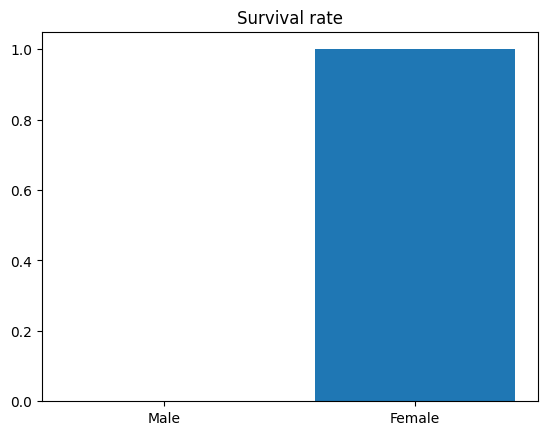

In [15]:
# how survival rate depends on sex

selected_dataset = scaled_dataset

male = selected_dataset[selected_dataset['Sex'] == 1]
survived_male = male['Survived'].sum()
male_survival_rate = survived_male / len(male)
print(f"Male survived: {survived_male} out of {len(male)}")

female = selected_dataset[selected_dataset['Sex'] == 0]
survived_female = female['Survived'].sum()
female_survival_rate = survived_female / len(female)
print(f"Female survived: {survived_female} out of {len(female)}")

plt.title('Survival rate')
plt.bar(['Male', 'Female'], [male_survival_rate, female_survival_rate])

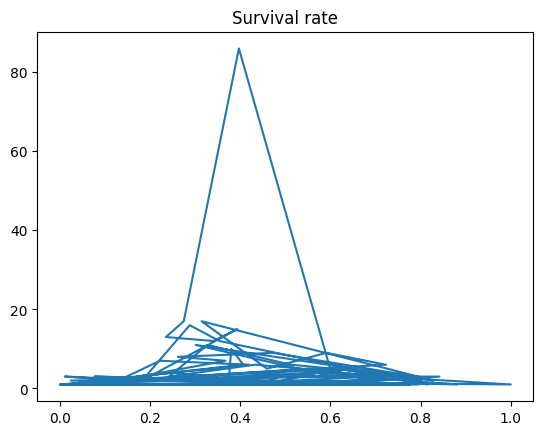

In [16]:
# how survival rate depends on age

age_survival = {}

for index, row in selected_dataset.iterrows():
    if row['Age'] not in age_survival:
        age_survival[row['Age']] = 1
    else:
        age_survival[row['Age']] += 1

for age in age_survival:
    age_survival[age] = len(selected_dataset[selected_dataset['Age'] == age])

plt.title('Survival rate')
plt.plot(age_survival.keys(), age_survival.values())

### **Linear regression**

In [17]:
import time
from sklearn.linear_model import LinearRegression

In [18]:
model1 = LinearRegression()
start = time.perf_counter()
model1.fit(training_data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']], training_data[['Survived']])
duration1 = time.perf_counter() - start

In [19]:
print("Coefficient:", model1.coef_)
print("Intercept:", model1.intercept_)

Coefficient: [[-1.00000000e+00 -3.23718989e-17  2.73113520e-17  1.97843999e-16
   4.66871166e-17]]
Intercept: [1.]


In [20]:
actual = testing_data['Survived'].to_numpy()
prediction1 = model1.predict(testing_data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']]).astype(int)[:, :1]

### **Model score**

In [21]:
from sklearn.metrics import (
    confusion_matrix,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    precision_score,
    accuracy_score,
    recall_score,
    f1_score
)

In [22]:
print('Mean square error:', mean_squared_error(actual, prediction1))
print('Root mean square error:', root_mean_squared_error(actual, prediction1))
print('R2 score:', r2_score(actual, prediction1))

Mean square error: 0.34523809523809523
Root mean square error: 0.5875696513930031
R2 score: -0.46394230769230815


In [23]:
confusion_matrix(actual, prediction1)

array([[52,  0],
       [29,  3]])

In [24]:
print('Precision:', precision_score(actual, prediction1))
print('Accuracy:', accuracy_score(actual, prediction1))
print('Recall:', recall_score(actual, prediction1))
print('F1 score:', f1_score(actual, prediction1))

Precision: 1.0
Accuracy: 0.6547619047619048
Recall: 0.09375
F1 score: 0.17142857142857143


### **Logistic regression**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model2 = LogisticRegression()
start = time.perf_counter()
model2.fit(training_data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']], training_data['Survived'])
duration2 = time.perf_counter() - start

In [27]:
prediction2 = model2.predict(testing_data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']])

### **Model score**

In [28]:
confusion_matrix(actual, prediction2)

array([[52,  0],
       [ 0, 32]])

In [29]:
print('Precision:', precision_score(actual, prediction2))
print('Accuracy:', accuracy_score(actual, prediction2))
print('Recall:', recall_score(actual, prediction2))
print('F1 score:', f1_score(actual, prediction2))

Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1 score: 1.0


### **Decision tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model3 = DecisionTreeClassifier()
start = time.perf_counter()
model3.fit(training_data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']], training_data['Survived'])
duration3 = time.perf_counter() - start

In [32]:
prediction3 = model3.predict(testing_data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']])

### **Model score**

In [33]:
confusion_matrix(actual, prediction3)

array([[52,  0],
       [ 0, 32]])

In [34]:
print('Precision:', precision_score(actual, prediction3))
print('Accuracy:', accuracy_score(actual, prediction3))
print('Recall:', recall_score(actual, prediction3))
print('F1 score:', f1_score(actual, prediction3))

Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1 score: 1.0


### **KNN**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model4 = KNeighborsClassifier()
start = time.perf_counter()
model4.fit(training_data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']], training_data['Survived'])
duration4 = time.perf_counter() - start

In [37]:
prediction4 = model4.predict(testing_data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']])

### **Model score**

In [38]:
confusion_matrix(actual, prediction4)

array([[50,  2],
       [ 0, 32]])

In [39]:
print('Precision:', precision_score(actual, prediction4))
print('Accuracy:', accuracy_score(actual, prediction4))
print('Recall:', recall_score(actual, prediction4))
print('F1 score:', f1_score(actual, prediction4))

Precision: 0.9411764705882353
Accuracy: 0.9761904761904762
Recall: 1.0
F1 score: 0.9696969696969697


### **Comparision**

In [40]:
def getScoreSeries(actual, predicted, duration) -> pd.Series:
    return pd.Series({
        'Precision': precision_score(actual, predicted),
        'Accuracy': accuracy_score(actual, predicted),
        'Recall': recall_score(actual, predicted),
        'F1 score': f1_score(actual, predicted),
        'Duration': duration
    })

In [41]:
pd.DataFrame({
        'Linear Regression': getScoreSeries(actual, prediction1, duration1),
        'Logistic Regression': getScoreSeries(actual, prediction2, duration2),
        'Decision Tree': getScoreSeries(actual, prediction3, duration3),
        'KNN': getScoreSeries(actual, prediction4, duration4),
    })

,Linear Regression,Logistic Regression,Decision Tree,KNN
Precision,1.000000,1.00000,1.000000,0.941176
Accuracy,0.654762,1.00000,1.000000,0.976190
Recall,0.093750,1.00000,1.000000,1.000000
F1 score,0.171429,1.00000,1.000000,0.969697
Duration,0.014201,0.00677,0.003839,0.003398
